<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-processing-Spacenet-Imagery" data-toc-modified-id="Pre-processing-Spacenet-Imagery-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-processing Spacenet Imagery</a></span><ul class="toc-item"><li><span><a href="#Convert-imagery-from-TIF-to-JPG" data-toc-modified-id="Convert-imagery-from-TIF-to-JPG-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convert imagery from TIF to JPG</a></span><ul class="toc-item"><li><span><a href="#Image-directory-settings" data-toc-modified-id="Image-directory-settings-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Image directory settings</a></span></li></ul></li><li><span><a href="#Convert-labels-to-Kitti-format" data-toc-modified-id="Convert-labels-to-Kitti-format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert labels to Kitti format</a></span></li></ul></li><li><span><a href="#Testing-that-data-was-correctly-processed" data-toc-modified-id="Testing-that-data-was-correctly-processed-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing that data was correctly processed</a></span><ul class="toc-item"><li><span><a href="#Image-tests" data-toc-modified-id="Image-tests-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image tests</a></span><ul class="toc-item"><li><span><a href="#Test-Case:-Confirm-that-imagery-data-is-in-8bit-PNG-format" data-toc-modified-id="Test-Case:-Confirm-that-imagery-data-is-in-8bit-PNG-format-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Test Case: Confirm that imagery data is in 8bit PNG format</a></span></li></ul></li><li><span><a href="#Label-Tests" data-toc-modified-id="Label-Tests-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Label Tests</a></span><ul class="toc-item"><li><span><a href="#Test-Case:-Ensure-that-bounding-boxes-fit-the-original-geometries" data-toc-modified-id="Test-Case:-Ensure-that-bounding-boxes-fit-the-original-geometries-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Test Case: Ensure that bounding boxes fit the original geometries</a></span></li></ul></li></ul></li><li><span><a href="#Trying-to-test-boxes-versus-images" data-toc-modified-id="Trying-to-test-boxes-versus-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying to test boxes versus images</a></span></li></ul></div>

# Pre-processing Spacenet Imagery

## Convert imagery from TIF to JPG

First we have to convert the Tif files into JPG files. The DetectNet framework uses the `Caffe` package, and this supports only 8 bit images. 

### Image directory settings

In [35]:
import os
import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.wkt import dumps, loads
import shapely
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from build_labels_in_kitti_format import process_raw_spacenet_labels_to_kitti_format
from preprocess_images_and_labels import delete_gdal_xml_files

In [3]:
source_image_directories = ['/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_2_Vegas_Test_public/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Train/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Test_public/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Test_public/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Train/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Train/RGB-PanSharpen/',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Test_public/RGB-PanSharpen/']


100%|██████████| 762/762 [00:00<00:00, 4574.28it/s]


In [4]:
source_image_directories = ['/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/']

for directory in source_image_directories:
    subprocess.call(['./convert_images_8bit', directory])
    delete_gdal_xml_files(directory)

100%|██████████| 3851/3851 [00:00<00:00, 102403.87it/s]


## Convert labels to Kitti format

In [ ]:
source_label_directories = ['/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/summaryData/AOI_2_Vegas_Train_Building_Solutions.csv',
                          '/media/hayagriva/data/spacenet/AOI_2_Vegas_Test_public/summaryData/',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Train/summaryData/AOI_',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Test_public/summaryData/AOI',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Test_public/summaryData/AOI',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Train/summaryData/AOI',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Train/summaryData/AOI',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Test_public/summaryData/AOI']

target_label_directories = ['/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_2_Vegas_Test_public/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Train/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_5_Khartoum_Test_public/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Test_public/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_4_Shanghai_Train/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Train/RGB-PanSharpen/new_labels_kitti_format/',
                          '/media/hayagriva/data/spacenet/AOI_3_Paris_Test_public/RGB-PanSharpen/new_labels_kitti_format/']

In [10]:
raw_labels = '/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/summaryData/AOI_2_Vegas_Train_Building_Solutions.csv'
labels_target_directory ='/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/new_labels'
img_directory = '/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/'
for directory in raw_labels:
    process_raw_spacenet_labels_to_kitti_format(raw_labels,labels_target_directory, img_directory)

created directory: /media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/new_labels
Processing csv data
Removing invalid data such as zero-sized geometries or pictures with no buildings.
Creating bounding boxes for labeled geometries.


  0%|          | 14/3608 [00:00<00:26, 134.79it/s]

Write text files with new image labels.


100%|██████████| 3616/3616 [00:00<00:00, 134312.82it/s]


Processing csv data
Removing invalid data such as zero-sized geometries or pictures with no buildings.
Creating bounding boxes for labeled geometries.


  0%|          | 14/3608 [00:00<00:26, 137.82it/s]

Write text files with new image labels.


100%|██████████| 3616/3616 [00:00<00:00, 197499.81it/s]


Processing csv data
Removing invalid data such as zero-sized geometries or pictures with no buildings.
Creating bounding boxes for labeled geometries.


  0%|          | 13/3608 [00:00<00:28, 125.69it/s]

Write text files with new image labels.


100%|██████████| 3616/3616 [00:00<00:00, 167894.74it/s]


Processing csv data
Removing invalid data such as zero-sized geometries or pictures with no buildings.
Creating bounding boxes for labeled geometries.


  0%|          | 14/3608 [00:00<00:25, 139.88it/s]

Write text files with new image labels.


 17%|█▋        | 626/3608 [00:04<00:22, 132.21it/s]


KeyboardInterrupt: 

# Testing that data was correctly processed

## Image tests



### Test Case: Confirm that imagery data is in 8bit PNG format 

In [2]:
src = rasterio.open('/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/RGB-PanSharpen/8bit_png_output/RGB-PanSharpen_AOI_2_Vegas_img10.png')
src.profile

{'affine': Affine(1.371093750002217e-06, 0.0, -115.3075176,
       0.0, -1.3710937499966657e-06, 36.1440926998),
 'count': 3,
 'crs': CRS({'init': 'epsg:4326'}),
 'driver': 'PNG',
 'dtype': 'uint8',
 'height': 1280,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': False,
 'transform': (-115.3075176,
  1.371093750002217e-06,
  0.0,
  36.1440926998,
  0.0,
  -1.3710937499966657e-06),
 'width': 1280}

## Label Tests
### Test Case: Ensure that bounding boxes fit the original geometries

In [3]:
labels_csv = pd.read_csv('/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/summaryData/AOI_2_Vegas_Train_Building_Solutions.csv')
geometry = labels_csv['PolygonWKT_Pix'].map(loads)
crs = {'init':'epsg:4326'}
gdf = gpd.GeoDataFrame(labels_csv, crs=crs, geometry=geometry)

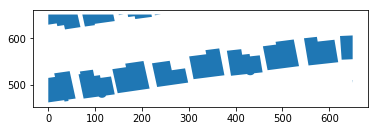

In [4]:
gdf.head(15).plot()

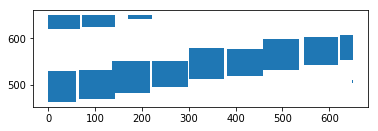

In [5]:
gdf.head(15).envelope.plot()

In [16]:
1280/650

1.9692307692307693

In [15]:
gdf.head(15).envelope.bounds

minx    miny    maxx    maxy
0     0.00  618.15   68.71  650.00
1   169.56  640.33  221.33  650.00
2   150.30  648.64  160.90  650.00
3    72.67  624.33  141.86  650.00
4   227.40  648.43  240.73  650.00
5     0.00  462.30   58.34  529.07
6    64.63  470.47  141.90  532.10
7   458.29  531.10  535.43  596.65
8   221.44  495.23  298.69  551.17
9   300.82  511.95  376.15  577.61
10  622.98  553.49  650.00  605.31
11  546.03  541.19  619.16  602.28
12  136.77  481.98  216.34  550.72
13  381.33  519.21  457.68  575.95
14  649.30  504.21  650.00  509.75

In [14]:
gdf.head(15).envelope.scale(1280/650, 1280/650, origin=(0, 0)).bounds

minx         miny         maxx         maxy
0      0.000000  1217.280000   135.305846  1280.000000
1    333.902769  1260.957538   435.849846  1280.000000
2    295.975385  1277.321846   316.849231  1280.000000
3    143.104000  1229.449846   279.355077  1280.000000
4    447.803077  1276.908308   474.052923  1280.000000
5      0.000000   910.375385   114.884923  1041.860923
6    127.271385   926.464000   279.433846  1047.827692
7    902.478769  1045.858462  1054.385231  1174.941538
8    436.066462   975.222154   588.189538  1085.380923
9    592.384000  1008.147692   740.726154  1137.447385
10  1226.791385  1089.949538  1280.000000  1191.995077
11  1075.259077  1065.728000  1219.268923  1186.028308
12   269.331692   949.129846   426.023385  1084.494769
13   750.926769  1022.444308   901.277538  1134.178462
14  1278.621538   992.905846  1280.000000  1003.815385

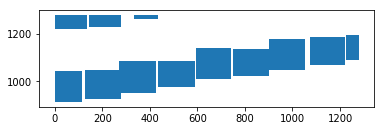

In [22]:
test.plot()

In [28]:
testing = gdf.head(15).envelope.scale(1280/650, 1280/650, origin=(0, 0)).bounds

# Trying to test boxes versus images



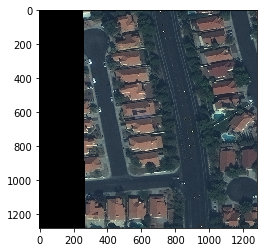

In [39]:
img = mpimg.imread('/media/hayagriva/data/spacenet/AOI_2_Vegas_Train/training/images/RGB-PanSharpen_AOI_2_Vegas_img3.png')
plt.imshow(img)


In [59]:
gdfim3 = gdf.loc[gdf['ImageId'] == 'AOI_2_Vegas_img3' ]
gdfim3.loc[:,'bbox'] = gdfim3.envelope.scale(1280/650, 1280/650, origin=(0, 0))

#gdfim3.to_file('AOI_2_Vegas_img3.geojson', driver='GeoJSON')

/media/hayagriva/anaconda3/envs/pBuildD/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/media/hayagriva/anaconda3/envs/pBuildD/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
gdfim3.head()

ImageId  BuildingId  \
73194  AOI_2_Vegas_img3           1   
73195  AOI_2_Vegas_img3           2   
73196  AOI_2_Vegas_img3           3   
73197  AOI_2_Vegas_img3           4   
73198  AOI_2_Vegas_img3           5   

                                          PolygonWKT_Pix  \
73194  POLYGON ((650.0 629.36 0,650.0 588.71 0,614.33...   
73195  POLYGON ((577.8 588.43 0,548.32 588.6 0,548.74...   
73196  POLYGON ((604.61 419.22 0,604.61 471.69 0,650....   
73197  POLYGON ((577.94 421.99 0,577.94 411.22 0,560....   
73198  POLYGON ((650.0 372.37 0,650.0 353.92 0,646.85...   

                                          PolygonWKT_Geo  \
73194  POLYGON ((-115.305762599996527 36.130108431267...   
73195  POLYGON ((-115.305957541999987 36.130218952000...   
73196  POLYGON ((-115.305885142999955 36.130675810000...   
73197  POLYGON ((-115.305957158999945 36.130668324000...   
73198  POLYGON ((-115.305762599996527 36.130802297144...   

                                                geometry  \
73194  POLYGON Z ((650 629.36 0, 650 588.71 0, 614.33...   
73195  POLYGON Z ((577.8 588.4299999999999 0, 548.320...   
73196  POLYGON Z ((604.61 419.22 0, 604.61 471.69 0, ...   
73197  POLYGON Z ((577.9400000000001 421.99 0, 577.94...   
73198  POLYGON Z ((650 372.37 0, 650 353.92 0, 646.85...   

                                                    bbox  
73194  POLYGON ((1202.825846153846 1159.305846153846,...  
73195  POLYGON ((1079.768615384615 1158.754461538462,...  
73196  POLYGON ((1190.616615384615 825.5409230769231,...  
73197  POLYGON ((1063.207384615385 809.7870769230771,...  
73198  POLYGON ((1273.796923076923 696.950153846154, ...